# On the magnitude of odd balls via Hankel determinants of reverse Bessel polynomials

## by Simon Willerton

This is a notebook to accompany the paper of the same name.  It will numerically verify some of the results in the paper and allow the reader to experiment on their own.

First just define a function that will be useful for making tables.

In [1]:
def make_table(f, header, num_rows=8, start=0):
    if type(header) == str:
        header = ("$i$", header)
    table_rows = []
    for i in range(start, num_rows):
        table_rows.append([i, f(i)])
    show(table(table_rows,
           header_row=header))

# Section 1.2.  The main results

Begin by defining the reverse Bessel polynomial $\chi_i(R)$ via the recursion
$$\chi_i(R) = R^2\chi{i-2}(R) + (2i-3)\chi_{i-1}$$
with the initial conditions
$$\chi_0(R)=1,\quad \chi_1(R)=R.$$

In [2]:
S.<R> = PolynomialRing(ZZ)

# Set the initial conditions of the recursion.
memo_chi = {0: 1, 1: R}

def chi(i):
    if i in memo_chi:
        return memo_chi[i]
    memo_chi[i] = R^2*chi(i-2) + (2*i-3)*chi(i-1)
    return memo_chi[i]

make_table(chi, "Reverse Bessel polynomial $\chi_{i}(R)$")

,Reverse Bessel polynomial
,
,
,
,
,
,
,
,


Now define the Hankel determinants, calculate them and verify that their ratios give the claimed expressions for the magnitude.

In [3]:
def hankel_chi(p, offset=0):
    return S(matrix([[chi(i+j+offset) 
                      for i in range(p+1)] 
                     for j in range(p+1)]).det())


make_table(lambda i: hankel_chi(i).factor(), 
           ("$p$", r"$\det\left[\chi_{i+j}(R)\right]_{i,j=0}^p$"), 
           num_rows=5)
make_table(lambda i: hankel_chi(i, offset=2).factor(), 
           ("$p$", r"$\det\left[\chi_{i+j+2}(R)\right]_{i,j=0}^p$"), 
           num_rows=4)
make_table(lambda i: 1/factorial(2*i+1)*
           SR(hankel_chi(i, offset=2)/R/hankel_chi(i)), 
           ("$p$", r"magnitude $\left\vert B^{2p+1}_R\right\vert$"), 
           num_rows=4)



,
,
,
,
,
,


,
,
,
,
,


,magnitude
,
,
,
,


We can calculate the polynomial part of the magnitude as $R\to \infty$ by just calculating the quotient of the numerator and denominator.

In [4]:
make_table(lambda i: (r"$\frac{1}{"+str(factorial(2*i+1))+"}("+
           latex(hankel_chi(i, offset=2).quo_rem(R*hankel_chi(i))[0])+")+O(R^{-1})$"), 
           ("$p$", "magnitude $|B^{2p+1}_R|$ as $R\\to \infty$"), 
           num_rows=5)

,magnitude as
,
,
,
,
,


We can use these these to verify the formulas given in the paper for the leading order terms of the numerator, denominator and asymptotic expansion.

In [5]:
def Np_leading(p):
    kappa = (p+1)*(p+2)/2
    return (R^kappa + (p+1)^2*(p+2)/2*R^(kappa-1)
            + p*(p+1)^3*(p+2)*(p+3)/8*R^(kappa-2))

def Dp_leading(p):
    kappa = (p+1)*(p+2)/2
    return (R^(kappa-2*p-1) + (p-1)*p*(p+1)/2*R^(kappa-2*p-2)
            + p*(p+1)^3*(p-2)*(p-1)/8*R^(kappa-2*p-3))

def asymptotic_leading(p):
    n = 2*p+1
    return (R^n + (n+1)*n/2*R^(n-1)
            + n*(n+1)^2*(n-1)/8*R^(n-2))

make_table(Np_leading, 
           ("$p$", r"leading terms of numerator of magnitude"), 
           num_rows=5)


make_table(Dp_leading, 
           ("$p$", r"leading terms of denominator of magnitude"), 
           num_rows=5)

make_table(lambda i: r"$\frac{1}{"+str(factorial(2*i+1))+"}\\left("
                     +latex(asymptotic_leading(i))
                     +"+O(R^{%s})\\right)"%(2*i-2), 
           ("$p$", r"leading terms of the asymptotic expansion of magnitude"), 
           num_rows=5)

,leading terms of numerator of magnitude
,
,
,
,
,


,leading terms of denominator of magnitude
,
,
,
,
,


,leading terms of the asymptotic expansion of magnitude
,
,
,
,
,


# Section 1.5.  The key integral

We can give the recursive defintions of $\tau_i$ and $\psi_i$ and verify the expressions given for small values of $i$.  We can also plot some examples.

,
,
,
,
,
,
,
,
,


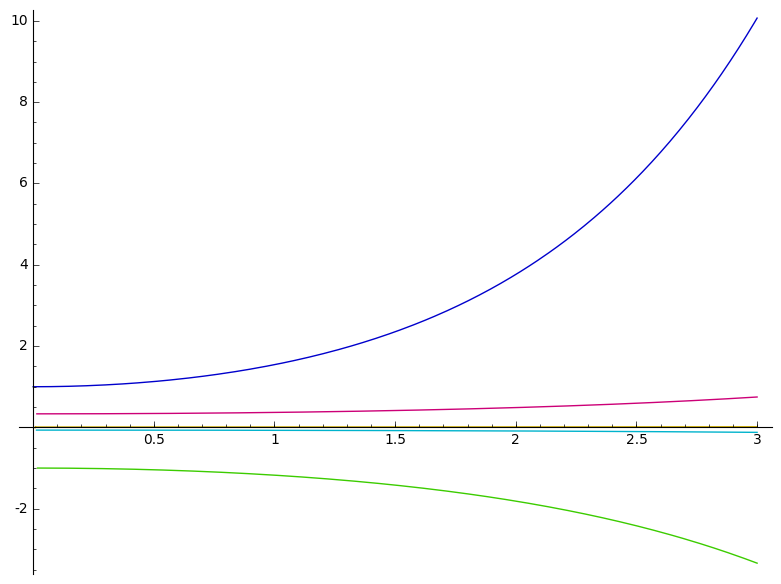

In [6]:
s = var('s')

memo_tau = {0: cosh(s)}

def tau(i):
    if i not in memo_tau:
        memo_tau[i] = ((-1/s * diff(tau(i-1), s)*exp(s)).expand())*exp(-s)
    return memo_tau[i]

make_table(tau, "$\\tau_i(s)$")

plot([tau(i) for i in range(5)], (s, 0, 3), ymax=10)

,
,
,
,
,
,
,
,
,


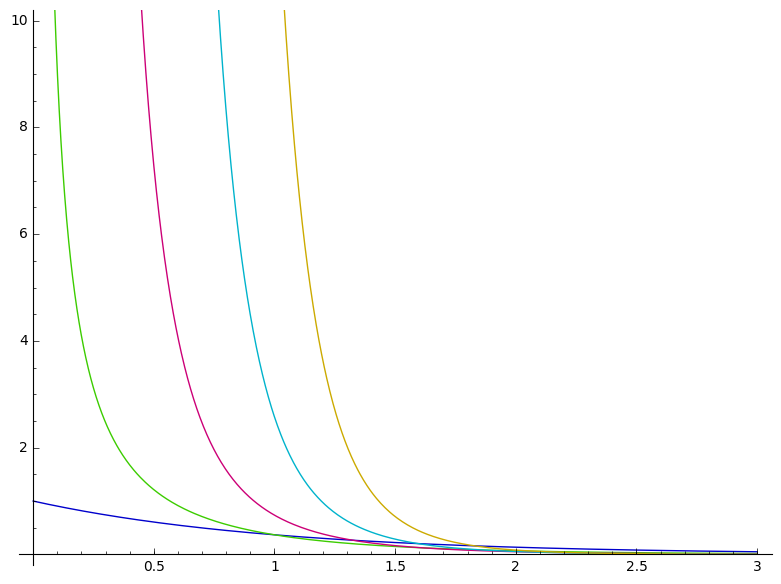

In [7]:
s = var('s')

memo_psi = {0: exp(-R)}

def psi(i):
    if i not in memo_psi:
        memo_psi[i] = (-1/R * diff(psi(i-1), R)).expand()
    return memo_psi[i]

make_table(psi, r"$\psi_i(R)$")

plot([psi(i) for i in range(5)], (R, 0, 3), ymax=10)

# Section 1.8. An example

We can do the calculation in the example.

In [8]:
F = FractionField(S)

def delta_p(f):
    return ((exp(R)*R^(2*p)*diff(f*exp(-R)*R^(-2*p), R))
            .expand().simplify().factor())
p = 2

M = matrix(F, [[(nest(delta_p, i, chi(p+j))) 
                for i in range(p+1)] for j in range(p+1)])
print html("The matrix is"), html(M)

The matrix is

<script type="math/tex">\left(\begin{array}{rrr} R^{2} + R & -R^{2} - 3R - 3 & \frac{R^{3} + 5R^{2} + 12R + 12}{R} \\ R^{3} + 3R^{2} + 3R & -R^{3} - 4R^{2} - 9R - 9 & \frac{R^{4} + 5R^{3} + 17R^{2} + 36R + 36}{R} \\ R^{4} + 6R^{3} + 15R^{2} + 15R & -R^{4} - 6R^{3} - 21R^{2} - 45R - 45 & \frac{R^{5} + 6R^{4} + 27R^{3} + 87R^{2} + 180R + 180}{R} \end{array}\right)</script>

In [9]:
b = vector(F, [chi(p+1+j)/R for j in range(p+1)])
print html("The right hand side vector is"), html(matrix(b).transpose())

The right hand side vector is

<script type="math/tex">\left(\begin{array}{r} R^{2} + 3R + 3 \\ R^{3} + 6R^{2} + 15R + 15 \\ R^{4} + 10R^{3} + 45R^{2} + 105R + 105 \end{array}\right)</script>

In [10]:
beta = M.solve_right(b)
show(LatexExpr(r"\beta(R) ="), matrix(beta).transpose())

\beta(R) = [(3*R^5 + 27*R^4 + 105*R^3 + 216*R^2 + 216*R + 72)/(R^5 + 3*R^4)]
[         (3*R^4 + 29*R^3 + 108*R^2 + 180*R + 120)/(R^4 + 3*R^3)]
[                        (R^3 + 9*R^2 + 27*R + 24)/(R^3 + 3*R^2)]

In [11]:
n = 2*p +1
n_factorial_magnitude = (R^n + n*beta[0]*R^(n-1))

show(LatexExpr("\left|B^%s_R"%(2*p+1)+r"\right|="), 
     1/n.factorial(),
     (n_factorial_magnitude.numerator()/(n_factorial_magnitude.denominator())))

\left|B^5_R\right|= 1/120 (R^6 + 18*R^5 + 135*R^4 + 525*R^3 + 1080*R^2 + 1080*R + 360)/(R + 3)

# Section 1.11. Further observations about the magnitude of odd balls

The numerator and denominator of the magnitude of an odd ball look like they are log-concave polynomials, so the logarithms of the coefficients form a concave sequence.  We can test this numerically by ploting the logarithms of the coefficients of some example.  A polynomial $\sum_i a_i R^i$ is log-concave if $\log(a_i^2/a_{i-1}a_{i+1})\ge 0$ for all $i$.

<script type="math/tex">p = 15</script>:

<h3>Numerator.</h3>

Plot of <script type="math/tex">\log_{10}(\textrm{coeffs})</script> of <script type="math/tex">N_{15}(R)</script>

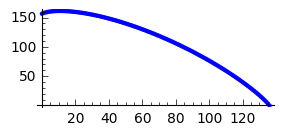

min of <script type="math/tex">\log(a_i^2/a_{i+1}a_{i-1})</script> = 0.0136287224521965

Log concave!

<h3>Denominator.</h3>

Plot of <script type="math/tex">\log_{10}(\textrm{coeffs})</script> of <script type="math/tex">D_{15}(R)</script>

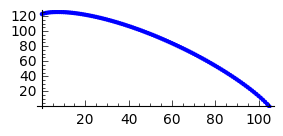

min of <script type="math/tex">\log(a_i^2/a_{i+1}a_{i-1})</script> = 0.0173158691040527

Log concave!

In [12]:
def log_concave(f, pic=True):
    """
    Take a polynomial f.
    If pic=True then plot the base-10 logs of the coefficients.
    Decide if the polynomial is log concave or not.
    """
    coeffs = f.coefficients()
    log_coeffs = map(lambda x: (log(x, 10)).n(), coeffs)
    if pic:
        show(list_plot(log_coeffs), figsize=[3, 1.5])
    concave =[]
    for i in range(1, len(log_coeffs)-1):
        concave.append(2*log_coeffs[i] - log_coeffs[i-1] - log_coeffs[i+1])
    print html("min of $\log(a_i^2/a_{i+1}a_{i-1})$ = %s"% min(concave)),
    if min(concave) >= 0:
        print html("Log concave!"),

        
def sf(k):
    "Calculate the superfactorial of k."
    return prod([factorial(i) for i in range(k+1)])

p = 15
print(html("$p = %s$:"%p))

print html("<h3>Numerator.</h3>")
numerator_poly = S(hankel_chi(p, 2)/(sf(p)*R^(p+1)))
print html("Plot of $\log_{10}(\\textrm{coeffs})$ of $N_{%s}(R)"%p)
log_concave(numerator_poly)
    
print html("<h3>Denominator.</h3>")
denominator_poly = S(hankel_chi(p)/(sf(p)*R^(p)))
print html("Plot of $\log_{10}(\\textrm{coeffs})$ of $D_{%s}(R)"%p)
log_concave(denominator_poly)


We can also plot the roots of these polynomials.  It looks like the roots all live in the region $\{z\mid 3\pi/4 < \arg(z)< 5\pi/4\}$.  If this were the case this would prove that the polynomials were log-concave.

Note that we have to use quite high precission arithmetic here, otherwise the root finding goes awry.  Remember we are dealing with polynomials of large degree and with massive coefficients of the order of $10^{100}$.  Normal complex numbers in Sage have 53 bits of precision, we will use 600 bits.

<script type="math/tex">p = 15</script>:

<h3>Numerator.</h3>

Plot of roots of <script type="math/tex">N_{15}(R)</script>

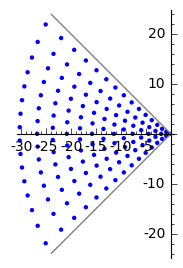

<h3>Denominator.</h3>

Plot of roots of <script type="math/tex">D_{15}(R)</script>

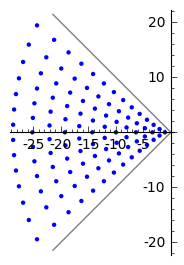

In [13]:

def plot_roots(poly, precision=600):
    "Plot the roots of the polynomial poly with the lines x=y and x=-y."
    CC = ComplexField(precision)
    roots = poly.roots(CC)
    min_im = min(map(lambda x: x[0].imag(), roots))-2
    show(list_plot(map(lambda x: (x[0].real(), x[0].imag()), roots))
         + plot(x, xmin=min_im, xmax=0, color="grey")
         + plot(-x, xmin=min_im, xmax=0, color="grey"), 
         aspect_ratio=1, figsize=(2,4)
        )
       
        
print(html("$p = %s$:"%p))

print html("<h3>Numerator.</h3>")
print html("Plot of roots of $N_{%s}(R)"%p)
plot_roots(numerator_poly)
    
print html("<h3>Denominator.</h3>")
print html("Plot of roots of $D_{%s}(R)"%p)
plot_roots(denominator_poly)


# Section 3.2.  Basic properties of our functions

Here we can just verify the formula given in the paper for the Taylor expansion of $\tau_i(r)$ at $r=0$.

In [14]:
r = var('r')
make_table(lambda i: taylor(tau(i)(s=r), r, 0, 6), r"First six terms of Taylor expansion of $\tau_i(r)$ at $r=0$")

,First six terms of Taylor expansion of at
,
,
,
,
,
,
,
,


In [15]:
def tau_taylor(i, top_k):
    return (-1)^i*sum([r^(2*k)/((2*k).factorial()*
                        prod([2*k+2*j+1 for j in range(i)]))
               for k in range(top_k+1)])

make_table(lambda i: tau_taylor(i, 3), 
           r"First six terms in the formula for the Taylor expansion of $\tau_i(r)$ at $r=0$")

,First six terms in the formula for the Taylor expansion of at
,
,
,
,
,
,
,
,


# Section 6.  Schroeder path formulas

We have formulas in the paper for the numerator and denominator polynomials of the magnitude in terms of weightings of collections of Schroeder paths:
$$N_p(R):=\sum_{\sigma\in X_{p+1}}W_2(\sigma, R);\qquad
D_p(R):=\sum_{\sigma\in X_{p-1}}W_0(\sigma, R).
$$
Here $X_k$ is the set of $k$-collections of disjoint Schroeder paths.  We can get Sage to enumerate the $k$-collections for small values of the collection size $k$ and calculate the polynomials $N_{k-1}(R)$ and $D_{k+1}(R)$.

There are 8 collection of length 2.

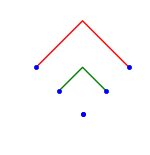

<script type="math/tex">W_0 = 60,\qquad W_2 = 6</script>

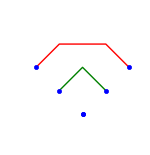

<script type="math/tex">W_0 = 12R,\qquad W_2 = 2R</script>

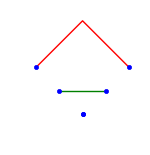

<script type="math/tex">W_0 = 20R,\qquad W_2 = 6R</script>

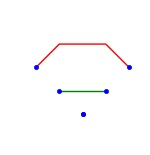

<script type="math/tex">W_0 = 4R^{2},\qquad W_2 = 2R^{2}</script>

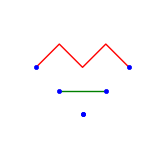

<script type="math/tex">W_0 = 16R,\qquad W_2 = 4R</script>

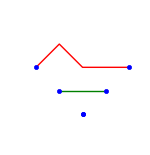

<script type="math/tex">W_0 = 4R^{2},\qquad W_2 = 2R^{2}</script>

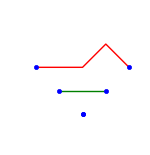

<script type="math/tex">W_0 = 4R^{2},\qquad W_2 = 2R^{2}</script>

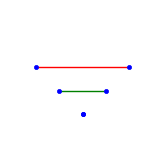

<script type="math/tex">W_0 = R^{3},\qquad W_2 = R^{3}</script>

<script type="math/tex">N_1(R) = R^{3} + 6R^{2} + 12R + 6</script>

<script type="math/tex">D_3(R) = R^{3} + 12R^{2} + 48R + 60</script>

In [16]:
display_collections = True
collection_size = 2  # This is k


def continue_s_path(path, under_paths, direction):
    """
    Extend the Schroeder path 'path' according to direction:
    +1 gives an ascent
    -1 gives a descent
    0 gives a flat step.
    Then if it hasn't reached the end then extend further
    so that it doesn't intersect the Schroeder paths in 
    'under_paths'.
    """
    
    # Make a new copy of path so as not to alter the old one.
    path = list(path)
    
    # Take the top path of the under paths
    under_path = under_paths[-1]
    
    if abs(direction) == 1:
        path.append(path[-1]+direction)
    else:
        # A flat step is treated as two short steps.
        path.extend([path[-1],path[-1]])

    n = len(under_paths)
    x = len(path) - n - 1
    y = path[-1]
    
    # If the path has reached the end of the line then add
    # to the collections and stop
    if x == n-1:
        collections.append(under_paths+[path+[n]])
        return
    if x == n:
        collections.append(under_paths+[path])
        return
    
    # Otherwise see how we can extend the path further.
    if x+y < 2*n:
        continue_s_path(path, under_paths, +1)
        
        if x == n-2:
            continue_s_path(path, under_paths, 0)

        elif under_path[len(path)] < y:
            continue_s_path(path, under_paths, 0)

    if under_path[len(path)-1] < y-1:
            continue_s_path(path, under_paths, -1)
    return


collections = [[[0]]]
for length in range(collection_size):
    old_collections = list(collections)
    collections = []
    for under_paths in old_collections:
        continue_s_path([len(under_paths)], under_paths, +1)
        if len(under_paths) == 1:
            continue_s_path([len(under_paths)], under_paths, 0)
        
        elif under_paths[-1][1] < len(under_paths):
            continue_s_path([len(under_paths)], under_paths, 0)
        

print html("There are %s collection of length %s.\n\n"%(
        len(collections), collection_size))


import matplotlib.pyplot as plt

def show_collection(collection):
    "Plot the collection of Schroeder paths"
    plt.figure(figsize=(1.5, 1.5))
    for path in collection:
        plt.plot(list(range(-(len(path)-1)/2, (len(path)-1)/2+1)), 
                 path)
    n = len(collection)
    for i in range(n):
        plt.plot([-i],[i], marker='.', color='b')
        plt.plot([i],[i], marker='.', color='b')
    plt.axes().set_aspect("equal")
    plt.axis([-(n-1/2), n-1/2, -1/2, 2*(n-1)+1/2])
    plt.axis('off')
    plt.show()
    return


def weight(collection, offset=1):
    "Calculate the weight of the collection."
    weight = 1
    for path in collection:
        j = 0
        while j < len(path)-1:
            if path[j+1] < path[j]:
                # we are descending
                weight *= path[j]+offset
            elif path[j+1] == path[j]:
                weight *= R
                j = j + 1
            j = j + 1
    return weight


total_weight_0 = 0
total_weight_2 = 0

for collection in collections:
    weight_0 = weight(collection, 1)
    weight_2 = weight(collection, -1)
    total_weight_0 += weight_0
    total_weight_2 += weight_2
    if display_collections:
        show_collection(collection)
        print(html("$W_0 = %s,\qquad W_2 = %s$"%(latex(weight_0),latex(weight_2)))),
        
#show(LatexExpr("N_%s(R) = "%(collection_size-1)),(total_weight_2))
#show(LatexExpr("D_%s(R) = "%(collection_size+1)),(total_weight_0))
print(html("$N_%s(R) = %s"%(collection_size-1, latex(total_weight_2))))
print(html("$D_%s(R) = %s"%(collection_size+1, latex(total_weight_0))))